In [1]:
# Aanpassing van de configuratie van Jupyter Notebook
%config IPCompleter.greedy = True
%matplotlib inline

# Importeren van de benodigde bibliotheken
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder


In [5]:
# Source pad van de dataset definiëren
orderData_source = 'Data/knipidee-2024-jan_feb_ma.csv'

# Dataset ophalen
orderData=pd.read_csv(orderData_source)

# Preview weergave van de eerste 5 rijen van de dataset
print('-----Preview van de dataset-----')
print(orderData.head())
print('-----Informatie over de dataset-----')
print(orderData.info())


-----Preview van de dataset-----
   order_number               order_date  customer_number  \
0         27572  2024-02-14 12:25:08.182             3091   
1         27718  2024-02-20 10:23:26.639            11825   
2         27718  2024-02-20 10:23:26.639            11825   
3         27718  2024-02-20 10:23:26.639            11825   
4         27718  2024-02-20 10:23:26.639            11825   

            customer_email     address_street address_zipcode address_city  \
0     info@ita-textiles.dk  Tordenskjoldsgade            1055   COPENHAGEN   
1  atelierulalma@gmail.com           bradului          410103       Oradea   
2  atelierulalma@gmail.com           bradului          410103       Oradea   
3  atelierulalma@gmail.com           bradului          410103       Oradea   
4  atelierulalma@gmail.com           bradului          410103       Oradea   

  address_country_name                  product_name  product_quantity  \
0                   DK                   0307 Selena     

Encodering van landcodes naar numerieke waarden:
      address_country_name  country_code_encoded
0                       DK                     8
1                       RO                    29
11                      DE                     7
14                      NL                    24
16                      FR                    12
17                      ES                    10
20                      EE                     9
32                      BG                     3
41                      BE                     2
88                      PT                    27
127                     GR                    14
173                     SE                    30
270                     PL                    26
324                     GB                    13
354                     IT                    20
446                     IL                    18
471                     CH                     5
502                     LV                    22
516                 

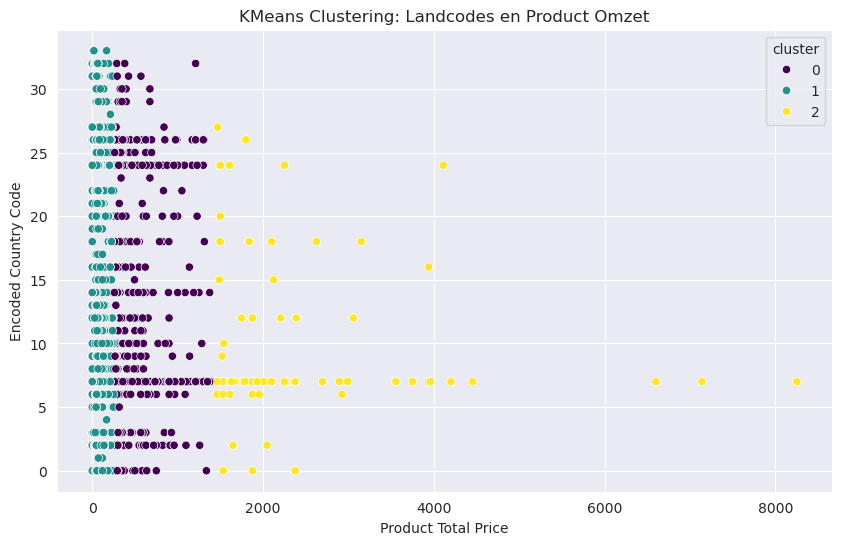

Cluster verdelingen:
cluster
1    18649
0     1383
2      107
Name: count, dtype: int64
Clustered data opgeslagen als clustered_orderData.csv.


In [3]:
# Stap 1: Encode landcodes ('address_country_name') naar numerieke waarden
encoder = LabelEncoder()
orderData['country_code_encoded'] = encoder.fit_transform(orderData['address_country_name'])

# Preview van de gecodeerde waarden
print("Encodering van landcodes naar numerieke waarden:")
print(orderData[['address_country_name', 'country_code_encoded']].drop_duplicates())

# Stap 2: KMeans clustering
# We gebruiken 'country_code_encoded' en 'product_total_price' als basisinput voor clustering
kmeans = KMeans(n_clusters=3, random_state=42)  # Verander n_clusters naar wens
orderData['cluster'] = kmeans.fit_predict(orderData[['country_code_encoded', 'product_total_price']])

# Preview van clusteringresultaten
print("Resultaten van KMeans clustering:")
print(orderData[['order_number', 'address_country_name', 'product_total_price', 'cluster']])

# Stap 3: Clusters visualiseren
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=orderData['product_total_price'],
    y=orderData['country_code_encoded'],
    hue=orderData['cluster'], palette='viridis'
)
plt.title("KMeans Clustering: Landcodes en Product Omzet")
plt.xlabel("Product Total Price")
plt.ylabel("Encoded Country Code")
plt.show()

# Clusterverdelingen bekijken
print("Cluster verdelingen:")
print(orderData['cluster'].value_counts())

# Verdeling van clusters opslaan in CSV
orderData.to_csv('clustered_orderData.csv', index=False)
print("Clustered data opgeslagen als clustered_orderData.csv.")

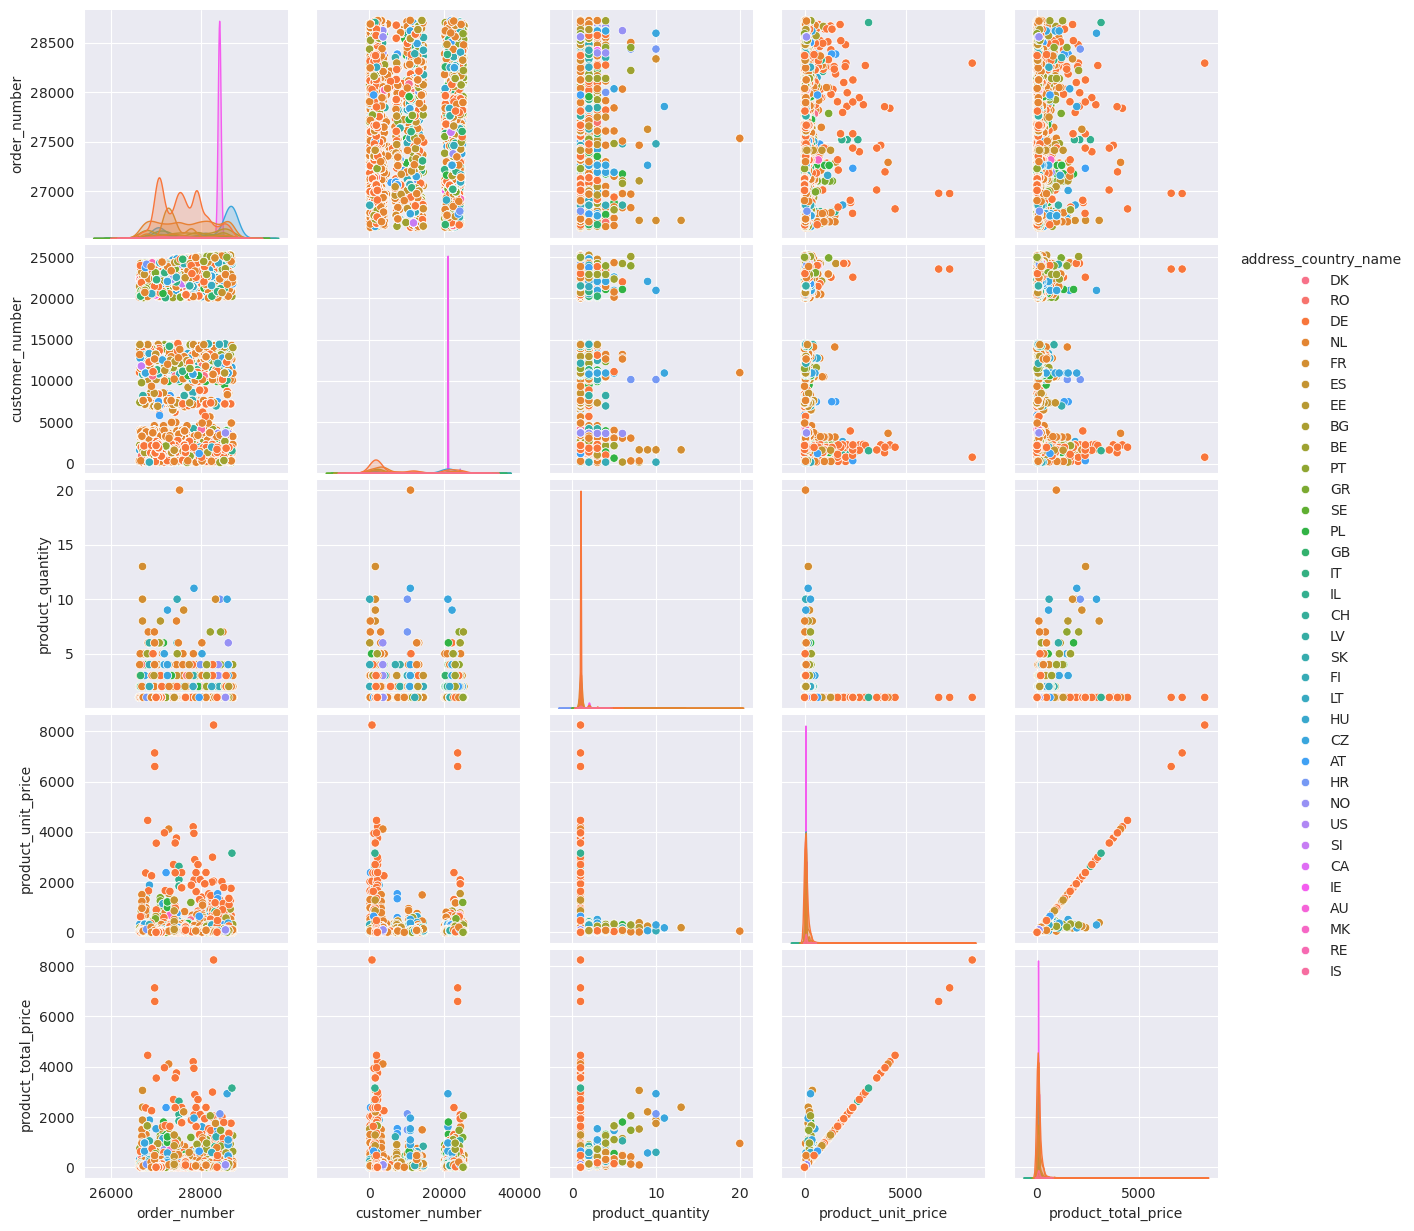

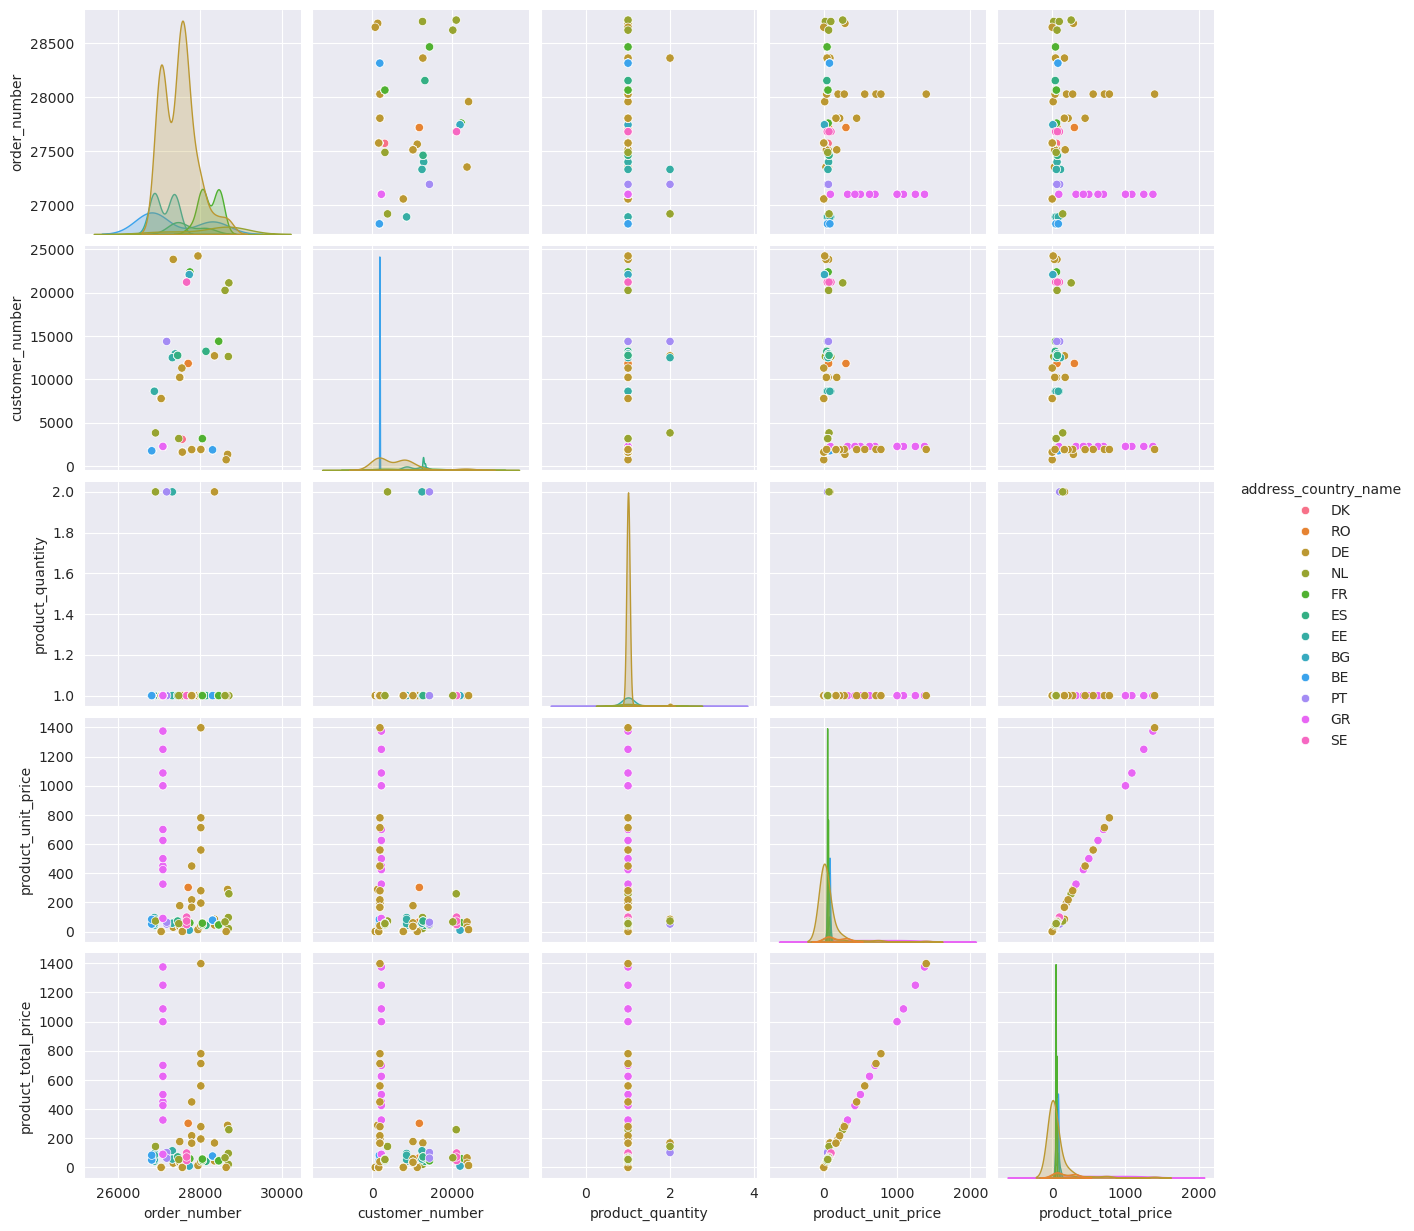

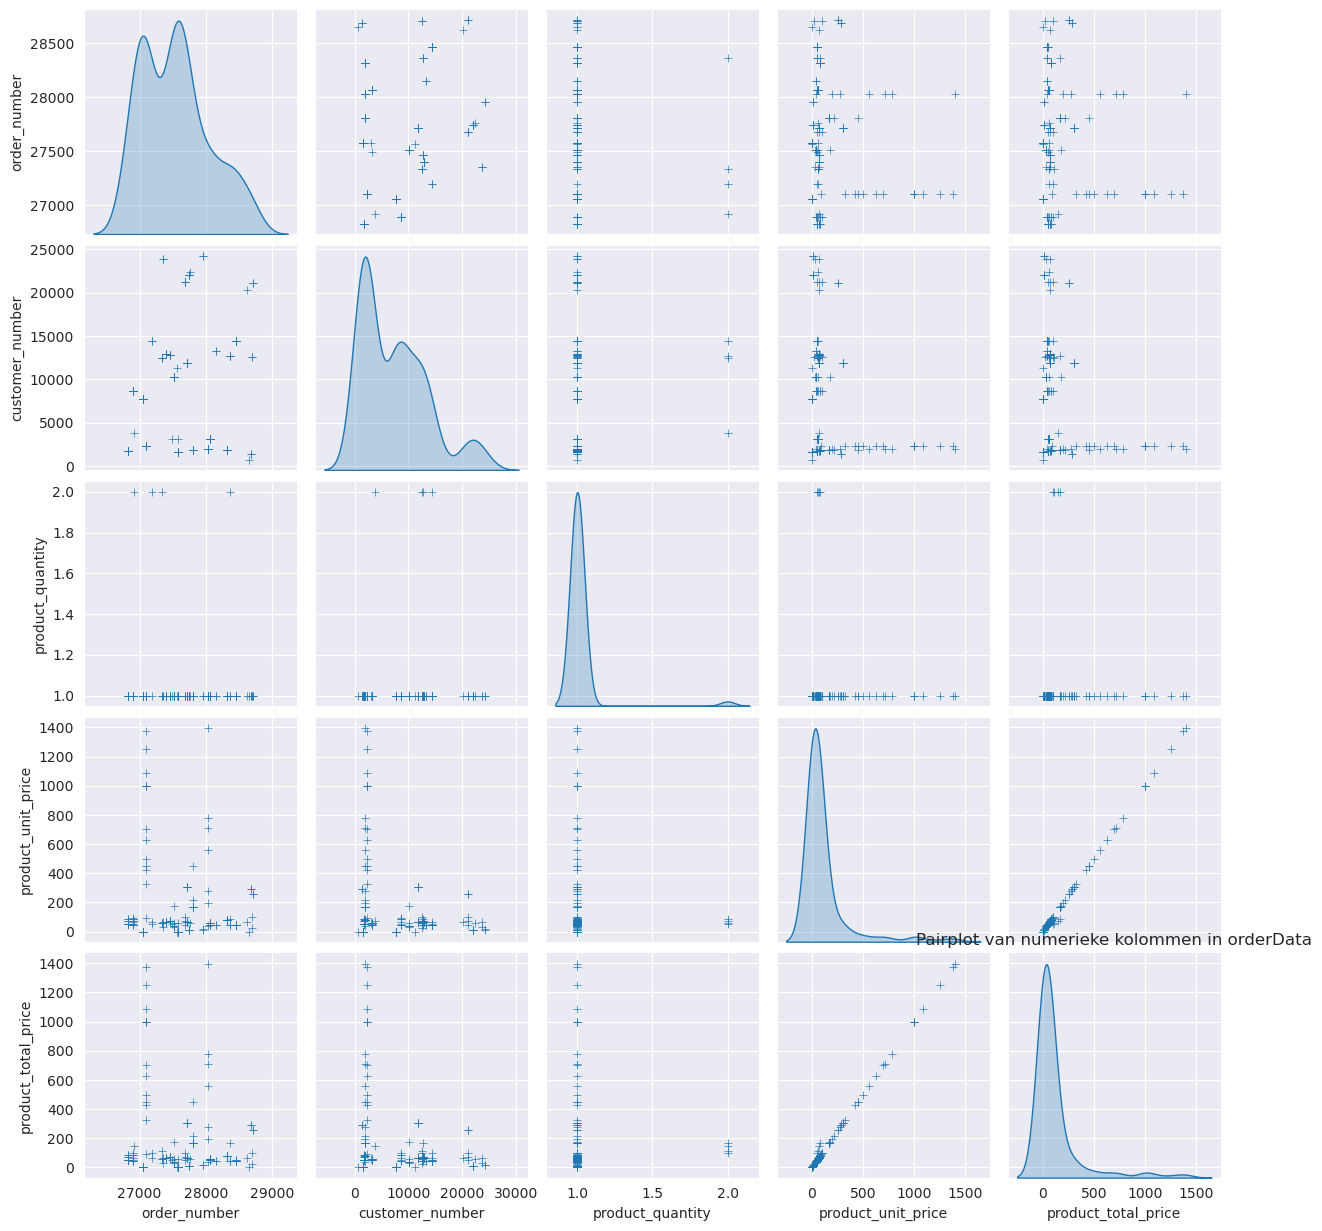

In [6]:
# Pairplot maken van numerieke gegevens
sns.pairplot(orderData, diag_kind='kde', markers='+')
plt.title("Pairplot van numerieke kolommen in orderData")
plt.show()